ランタイムの接続が切れないようにするJavaScriptコード
DevToolsのコンソールに入力


```javascript
function KeepClicking(){
console.log("Clicking");
document.querySelector("colab-connect-button").click();
}
setInterval(KeepClicking,60000);
```



# データのインポート
google driveをマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ライブラリの読み込み

In [12]:
# tensorflow
import tensorflow as tf
from tensorflow import keras

import os
import numpy as np
import IPython.display as display
import random
import matplotlib.pyplot as plt

作業ディレクトリの移動とデータの読み込み

/content/drive/MyDrive/colab/hisseki_test_py
all_datas:
[{'path': 'tf_datas/hisseki13.png', 'label': 10}, {'path': 'tf_datas/hisseki118.png', 'label': 5}, {'path': 'tf_datas/hisseki170.png', 'label': 2}, {'path': 'tf_datas/hisseki12.png', 'label': 5}, {'path': 'tf_datas/hisseki123.png', 'label': 6}, {'path': 'tf_datas/hisseki119.png', 'label': 16}, {'path': 'tf_datas/hisseki150.png', 'label': 10}, {'path': 'tf_datas/hisseki164.png', 'label': 7}, {'path': 'tf_datas/hisseki105.png', 'label': 12}, {'path': 'tf_datas/hisseki44.png', 'label': 13}, {'path': 'tf_datas/hisseki39.png', 'label': 9}, {'path': 'tf_datas/hisseki128.png', 'label': 15}, {'path': 'tf_datas/hisseki138.png', 'label': 3}, {'path': 'tf_datas/hisseki167.png', 'label': 3}, {'path': 'tf_datas/hisseki75.png', 'label': 2}, {'path': 'tf_datas/hisseki43.png', 'label': 6}, {'path': 'tf_datas/hisseki15.png', 'label': 8}, {'path': 'tf_datas/hisseki20.png', 'label': 7}, {'path': 'tf_datas/hisseki10.png', 'label': 9}, {'path': 'tf_da

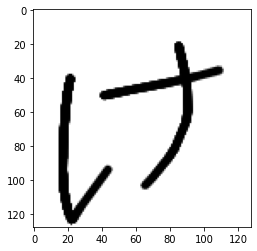

In [29]:
%cd /content/drive/MyDrive/colab/hisseki_test_py

def preprocess_image(image):
  image_4ch = tf.image.decode_image(image, channels=4)
  image_4ch = tf.image.resize(image_4ch, [128, 128])
  # image = tf.cast(tf.reduce_sum(image_4ch, 2, keepdims=True), tf.float32)
  # image /= 255.0  # normalize to [0,1] range
  image_4ch /= 255.0

  return image_4ch

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

label_file = open("tf_datas/labels.txt")
labels_str = label_file.readlines()
label_file.close()
labels = list(map(lambda str: int(str), labels_str))

data_num = len(labels)
all_datas = []
for i in range(data_num):
  all_datas.append({"path": "tf_datas/hisseki%d.png" % i, "label": labels[i]})
random.shuffle(all_datas)

print("all_datas:")
print(all_datas)

labels = []
image_paths = []
for data in all_datas:
  image_paths.append(data["path"])
  labels.append(data["label"])

image_path = image_paths[0]

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
# plt.xlabel(caption_image(image_path))
# plt.title(label_names[label].title())
print()